In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
plt.style.use('ggplot')

create dataframe

In [2]:
data_siu9 = pd.read_csv("data/SiU9.txt")
data_sih9 = pd.read_csv("data/SiH9.txt")
data_sim9 = pd.read_csv("data/SiM9.txt")
data_siz9 = pd.read_csv("data/SiZ9.txt")

data = pd.DataFrame()
data['close_siu9'] = data_siu9['<CLOSE>']
data['close_sih9'] = data_sih9['<CLOSE>']
data['close_sim9'] = data_sim9['<CLOSE>']

data['close_siz9'] = data_siz9['<CLOSE>']
data

,close_siu9,close_sih9,close_sim9,close_siz9
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,65884.0
2,67047.0,NaN,NaN,NaN
3,66871.0,NaN,66030.0,65081.0
4,67150.0,NaN,NaN,65255.0
...,...,...,...,...
514,64254.0,NaN,NaN,NaN
515,64001.0,NaN,NaN,NaN
516,64346.0,NaN,NaN,NaN
517,64220.0,NaN,NaN,NaN


In [3]:
# number of NaN
data.isna().sum()

close_siu9    111
close_sih9    103
close_sim9    114
close_siz9    110
dtype: int64

In [4]:
# finished dataset
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index'],axis = 1, inplace=True)

In [5]:
data

,close_siu9,close_sih9,close_sim9,close_siz9
0,65491.0,64904.0,67576.0,63090.0
1,64829.0,64988.0,67300.0,61893.0
2,65235.0,64672.0,67299.0,60949.0
3,65901.0,64044.0,67110.0,61523.0
4,64500.0,64625.0,65571.0,62350.0
...,...,...,...,...
283,66875.0,66095.0,64969.0,62891.0
284,67177.0,65746.0,64821.0,62451.0
285,66240.0,65500.0,64613.0,62506.0
286,66239.0,65590.0,64576.0,62553.0


/tmp/ipykernel_11991/3053685069.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pylab.subplot (2, 2, 1)


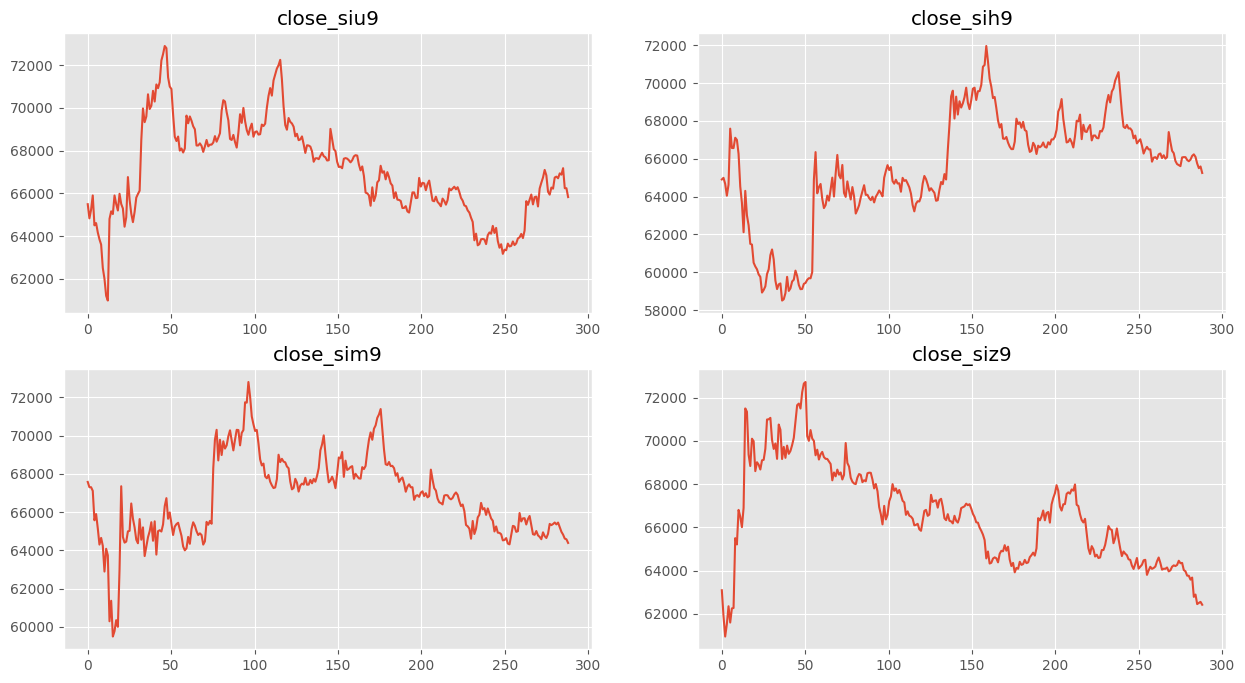

In [6]:
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots()

# Две строки, два столбца. Текущая ячейка - 1
pylab.subplot (2, 2, 1)
plt.plot(np.linspace(0, len(data), len(data)), data['close_siu9'])
pylab.title ("close_siu9")

pylab.subplot (2, 2, 2)
plt.plot(np.linspace(0, len(data), len(data)), data['close_sih9'])
pylab.title ("close_sih9")

pylab.subplot (2, 2, 3)
plt.plot(np.linspace(0, len(data), len(data)), data['close_sim9'])
pylab.title ("close_sim9")

pylab.subplot (2, 2, 4)
plt.plot(np.linspace(0, len(data), len(data)), data['close_siz9'])
pylab.title ("close_siz9")


fig.set_figwidth(15)
fig.set_figheight(8)

plt.show()


In [7]:
def get_return(dataframe, column):
    returnn = []
    data = dataframe[column]
    for i in range(1, len(data)):
        returnn.append((data[i] / data[i - 1]) - 1)
    return returnn

In [8]:
return_siu9 = pd.DataFrame({'return_siu9': get_return(data, 'close_siu9')})
return_sih9 = pd.DataFrame({'return_sih9': get_return(data, 'close_sih9')})
return_sim9 = pd.DataFrame({'return_sim9': get_return(data, 'close_sim9')})
return_siz9 = pd.DataFrame({'return_siz9': get_return(data, 'close_siz9')})

In [9]:
return_data = pd.DataFrame()
return_data = pd.concat([return_siu9, return_sih9, return_sim9, return_siz9], axis=1)
return_data

,return_siu9,return_sih9,return_sim9,return_siz9
0,-0.010108,0.001294,-0.004084,-0.018973
1,0.006263,-0.004862,-0.000015,-0.015252
2,0.010209,-0.009711,-0.002808,0.009418
3,-0.021259,0.009072,-0.022932,0.013442
4,0.001612,0.045896,0.004987,-0.012077
...,...,...,...,...
282,-0.000881,-0.002068,-0.003803,0.001688
283,0.004516,-0.005280,-0.002278,-0.006996
284,-0.013948,-0.003742,-0.003209,0.000881
285,-0.000015,0.001374,-0.000573,0.000752


In [10]:
data.drop(index=0, inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index'],axis = 1, inplace=True)
data = pd.concat([data, return_data], axis=1)
data

,close_siu9,close_sih9,close_sim9,close_siz9,return_siu9,return_sih9,return_sim9,return_siz9
0,64829.0,64988.0,67300.0,61893.0,-0.010108,0.001294,-0.004084,-0.018973
1,65235.0,64672.0,67299.0,60949.0,0.006263,-0.004862,-0.000015,-0.015252
2,65901.0,64044.0,67110.0,61523.0,0.010209,-0.009711,-0.002808,0.009418
3,64500.0,64625.0,65571.0,62350.0,-0.021259,0.009072,-0.022932,0.013442
4,64604.0,67591.0,65898.0,61597.0,0.001612,0.045896,0.004987,-0.012077
...,...,...,...,...,...,...,...,...
282,66875.0,66095.0,64969.0,62891.0,-0.000881,-0.002068,-0.003803,0.001688
283,67177.0,65746.0,64821.0,62451.0,0.004516,-0.005280,-0.002278,-0.006996
284,66240.0,65500.0,64613.0,62506.0,-0.013948,-0.003742,-0.003209,0.000881
285,66239.0,65590.0,64576.0,62553.0,-0.000015,0.001374,-0.000573,0.000752


### Create alphas

In [11]:
# создание коэффициентов
return_plus = []
return_minus =[]
alphas = np.zeros((len(data), 4))

for i, row in enumerate(data.itertuples()):
    temp_plus = 0
    temp_minus = 0
    for j in range(5, 9):
        if row[j] > 0:
            temp_plus += row[j]
        else:
            temp_minus += row[j]

    # create alphas
    for j in range(5, 9):
        if row[j] > 0:
            alphas[i][j - 5] = (-row[j] / temp_plus) / 2
        else:
            alphas[i][j - 5] = (row[j] / temp_minus) / 2

    # return_plus.append(temp_plus)
    # return_minus.append(temp_minus)
        

In [12]:
data['alpha_siu9'] = alphas[:, 0]
data['alpha_sih9'] = alphas[:, 1]
data['alpha_sim9'] = alphas[:, 2]
data['alpha_siz9'] = alphas[:, 3]

In [13]:
data

,close_siu9,close_sih9,close_sim9,close_siz9,return_siu9,return_sih9,return_sim9,return_siz9,alpha_siu9,alpha_sih9,alpha_sim9,alpha_siz9
0,64829.0,64988.0,67300.0,61893.0,-0.010108,0.001294,-0.004084,-0.018973,0.152391,-0.500000,0.061574,0.286034
1,65235.0,64672.0,67299.0,60949.0,0.006263,-0.004862,-0.000015,-0.015252,-0.500000,0.120779,0.000369,0.378852
2,65901.0,64044.0,67110.0,61523.0,0.010209,-0.009711,-0.002808,0.009418,-0.260082,0.387835,0.112165,-0.239918
3,64500.0,64625.0,65571.0,62350.0,-0.021259,0.009072,-0.022932,0.013442,0.240534,-0.201472,0.259466,-0.298528
4,64604.0,67591.0,65898.0,61597.0,0.001612,0.045896,0.004987,-0.012077,-0.015358,-0.437143,-0.047499,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
282,66875.0,66095.0,64969.0,62891.0,-0.000881,-0.002068,-0.003803,0.001688,0.065268,0.153161,0.281571,-0.500000
283,67177.0,65746.0,64821.0,62451.0,0.004516,-0.005280,-0.002278,-0.006996,-0.500000,0.181397,0.078258,0.240346
284,66240.0,65500.0,64613.0,62506.0,-0.013948,-0.003742,-0.003209,0.000881,0.333710,0.089519,0.076771,-0.500000
285,66239.0,65590.0,64576.0,62553.0,-0.000015,0.001374,-0.000573,0.000752,0.012843,-0.323157,0.487157,-0.176843


In [14]:
data.to_csv('data.csv', index=False)